In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading The Dataset

In [23]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")
df = pd.concat([train, test], ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [24]:
# X_df = df[]

In [25]:
cols_to_drop = [
    "Id", "Street", "Utilities", "Condition2", "RoofMatl", "Heating", "Functional",
    "GarageCond", "BsmtFinSF2", "LowQualFinSF", "3SsnPorch", "ScreenPorch",
    "PoolArea", "MiscVal"
]

# Drop columns from the DataFrame
df.drop(columns=cols_to_drop, inplace=True)

In [26]:
def grab_col_names(dataframe, cat_th=1, car_th=20):
    # Extract columns that are string/object type
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # Identify numerical columns that have fewer unique values than cat_th (treat as cat)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th
                   and dataframe[col].dtypes != "O"]
    # Identify categorical columns that have more unique values than car_th (treat as high-card)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th
                   and dataframe[col].dtypes == "O"]

    # Combine "object-type" columns with numeric columns that should be treated as categorical
    cat_cols = cat_cols + num_but_cat
    # Exclude the high-card columns from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identify numeric columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    # Exclude columns that are actually numeric but should be treated as categorical
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Print summary of the DataFrame and classification results
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 67
cat_cols: 35
num_cols: 31
cat_but_car: 1
num_but_cat: 0


## Feature Engineering

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

# Plot dendrogram from correlation matrix
def plot_correlation_dendrogram(dataframe, num_cols):
    corr = dataframe[num_cols].corr().abs()
    distance_matrix = 1 - corr
    dist_array = squareform(distance_matrix.values, checks=False)
    linkage_matrix = linkage(dist_array, method='ward')

    plt.figure(figsize=(20, 6))
    dendrogram(linkage_matrix, labels=num_cols, leaf_rotation=90)
    plt.title("Dendrogram - Numerical Feature Clustering")
    plt.tight_layout()
    plt.show()

# Select representative features using hierarchical clustering
def select_correlated_features(dataframe, num_cols, threshold=0.9):
    corr = dataframe[num_cols].corr().abs()
    distance_matrix = 1 - corr
    dist_array = squareform(distance_matrix.values, checks=False)
    linkage_matrix = linkage(dist_array, method='ward')
    cluster_labels = fcluster(linkage_matrix, t=threshold, criterion='distance')

    clusters = pd.DataFrame({'feature': num_cols, 'cluster': cluster_labels})
    selected_features = clusters.groupby('cluster')['feature'].first().tolist()

    return selected_features, clusters

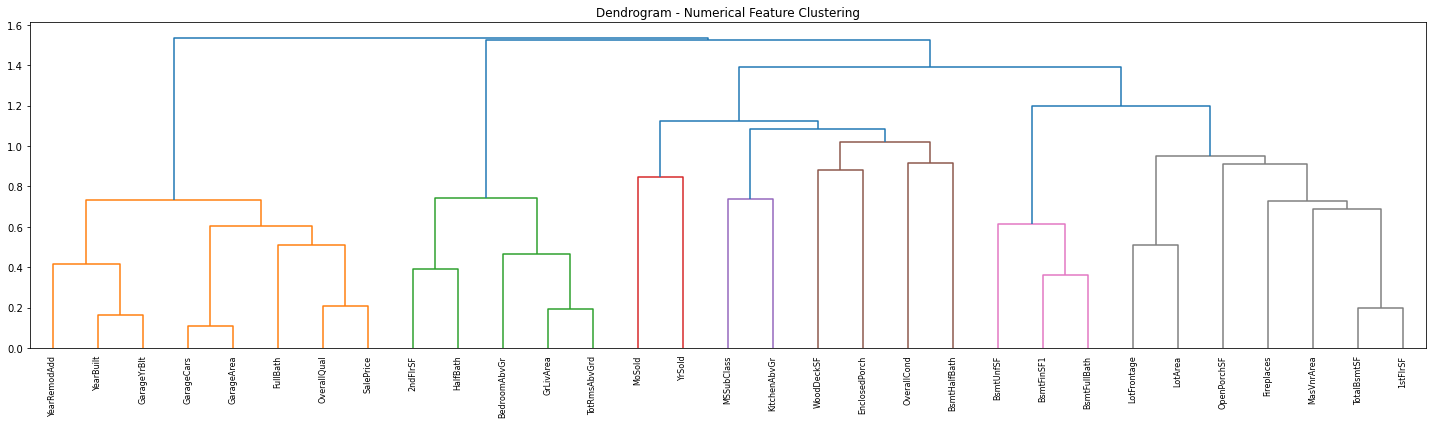

In [28]:
# Plot dendrogram to visualize correlation structure
plot_correlation_dendrogram(df, num_cols)

In [29]:
reduced_features, cluster_info = select_correlated_features(df, num_cols, threshold=0.9)
print("Selected Features:")
print(reduced_features)

Selected Features:
['OverallQual', '2ndFlrSF', 'MoSold', 'MSSubClass', 'WoodDeckSF', 'OverallCond', 'BsmtHalfBath', 'BsmtFinSF1', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF']


In [30]:
num_cols = reduced_features.append('SalePrice')

## Missing Value Analysis

In [31]:
# Display and plot missing value counts and ratios for each column
def missing_values_table(dataframe, na_name=False, plot=True):
    """
    Prints and optionally plots missing value counts and percentages for each column.
    """
    # Get columns with missing values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of missing values
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    # Percentage of missing values
    ratio = (n_miss / dataframe.shape[0] * 100).sort_values(ascending=False)

    # Combine into a summary DataFrame
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Missing Count', 'Missing Ratio (%)'])

    # Print missing value table
    print("Missing Values Summary:\n")
    print(missing_df)

    # Optional barplot of missing percentages
    if plot and not missing_df.empty:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=missing_df.index, y=missing_df["Missing Ratio (%)"])
        plt.title("Missing Value Ratio per Column")
        plt.xticks(rotation=45)
        plt.ylabel("Missing Ratio (%)")
        plt.xlabel("Column Name")
        plt.tight_layout()
        plt.show()

    # Return column names if requested
    if na_name:
        return na_columns

Missing Values Summary:

             Missing Count  Missing Ratio (%)
PoolQC                2909             99.660
MiscFeature           2814             96.400
Alley                 2721             93.220
Fence                 2348             80.440
MasVnrType            1766             60.500
...                    ...                ...
BsmtFinSF1               1              0.030
Exterior2nd              1              0.030
Exterior1st              1              0.030
SaleType                 1              0.030
Electrical               1              0.030

[31 rows x 2 columns]


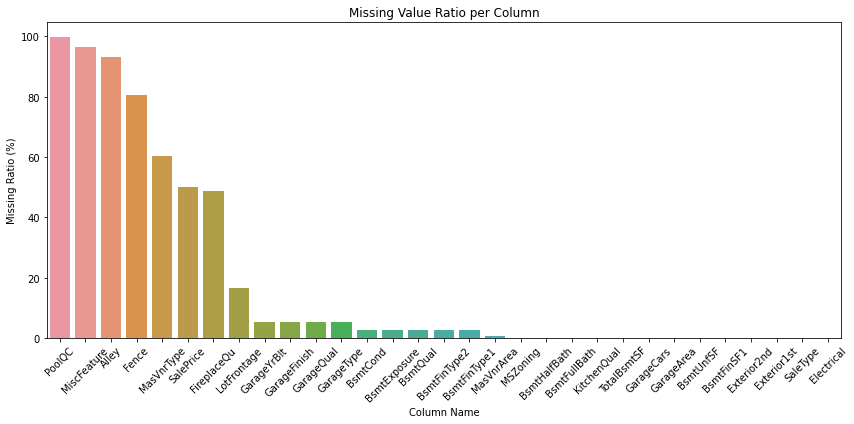

In [32]:
missing_values_table(df)

In [33]:
# Quickly handle missing values for both categorical and numerical features
def quick_missing_imp(data, num_method="median", cat_length=15, target="SalePrice"):
    temp_target = data[target]

    # Fill missing values in categorical columns (with limited unique values)
    data = data.apply(
        lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x,
        axis=0
    )

    # Fill missing values in numerical columns
    if num_method == "median":
        data = data.apply(
            lambda x: x.fillna(x.median()) if x.dtype != "O" else x,
            axis=0
        )
    elif num_method == "mean":
        data = data.apply(
            lambda x: x.fillna(x.mean()) if x.dtype != "O" else x,
            axis=0
        )

    # Restore the target column
    data[target] = temp_target

    return data

# Custom filling: fill missing MSZoning values using mode within each MSSubClass group
# df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# Custom filling: fill missing LotFrontage values using median within each Neighborhood group
# df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Apply quick imputation to the rest of the dataset
df = quick_missing_imp(df, num_method="median", cat_length=15)

Missing Values Summary:

             Missing Count  Missing Ratio (%)
SalePrice             1459             49.980
Exterior1st              1              0.030
Exterior2nd              1              0.030


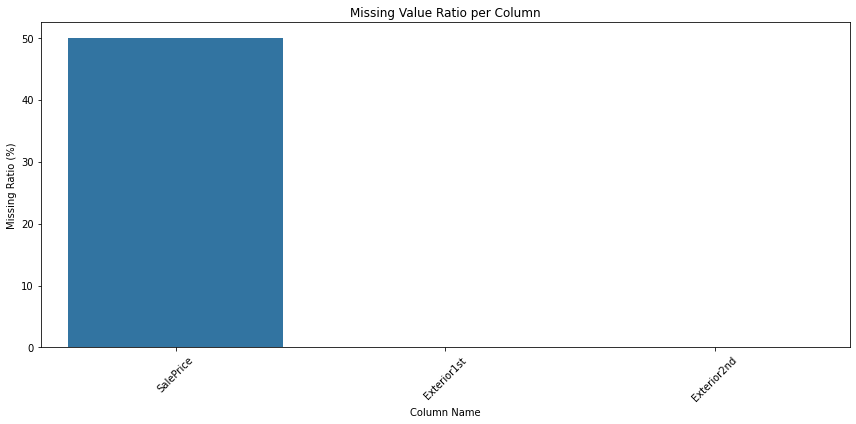

In [34]:
missing_values_table(df)

In [35]:
df.shape

(2919, 67)

## Encoding

In [36]:
# Label Encoding
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    label_encoder(df, col)

# One-Hot Encoding
cat_cols = [col for col in cat_cols if col not in binary_cols]
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df = df.drop(["Neighborhood"], axis=1)
df.head()

,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,0,7,5,2003,2003,196.000,706.000,150.000,856.000,1,856,854,1710,1.000,0.000,2,1,3,1,8,0,2003.000,2.000,548.000,0,61,0,2,2008,208500.000,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,20,80.000,9600,0,6,8,1976,1976,0.000,978.000,284.000,1262.000,1,1262,0,1262,0.000,1.000,2,0,3,1,6,1,1976.000,2.000,460.000,298,0,0,5,2007,181500.000,False,False,True

In [37]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [38]:
train_df.to_csv("./dataset/cleaned_train.csv", index=False)
test_df.to_csv("./dataset/cleaned_test.csv", index=False)